In [1]:
import numpy as np
import pandas as pd
import json
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def flatten_data_LARGE(file_directory):

    with open(file_directory, 'r') as file:
        data = json.load(file)

    flattened_data = []

    # iterate through each entry in the data
    for entry in data:
        question_id = entry['id']
        ambiguous_question = entry['question']

        # check the type of annotations and process accordingly
        for annotation in entry['annotations']:
            if annotation['type'] == 'multipleQAs':
                for qa_pair in annotation['qaPairs']:
                    flattened_data.append({
                        'id': question_id,
                        'viewed_doc_titles': entry['viewed_doc_titles'][0],
                        'ambiguous_question': ambiguous_question,
                        'disambiguated_question': qa_pair['question'],
                        'answer': qa_pair['answer'][0]
                        # 'page_content': entry['used_queries']
                    })
            elif annotation['type'] == 'singleAnswer':
                flattened_data.append({
                    'id': question_id,
                    'ambiguous_question': ambiguous_question,
                    'disambiguated_question': np.nan,
                    'answer': annotation['answer'][0]
                })

    ambiguous_df = pd.DataFrame(flattened_data)
    return ambiguous_df

In [3]:
file_path = '../../data/LARGE/train.json'
ambiguous_train_LARGE_df = flatten_data_LARGE(file_path)
ambiguous_train_LARGE_df.head()

,id,viewed_doc_titles,ambiguous_question,disambiguated_question,answer
0,-4469503464110108318,The Simpsons,When did the simpsons first air on television?,When did the Simpsons first air on television ...,"April 19, 1987"
1,-4469503464110108318,The Simpsons,When did the simpsons first air on television?,When did the Simpsons first air as a half-hour...,"December 17, 1989"
2,4790842463458965203,NaN,Who played george washington in the john adams...,NaN,David Morse
3,-6631915997977101143,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par...",18 years of age
4,-6631915997977101143,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par...",19


In [4]:
print(len(ambiguous_train_LARGE_df))

19541


In [5]:
# CITATION: Code snippet from ChatGPT for help to visualize data to learn more on how I should process the data.
def read_json_in_chunks(file_path, chunk_size=1000):
    with open(file_path, 'r') as file:
        chunk = []
        for line in file:
            chunk.append(json.loads(line))
            if len(chunk) >= chunk_size:
                yield chunk
                chunk = []
        if chunk:
            yield chunk

# Example usage
for chunk in read_json_in_chunks(file_path):
    # Process each chunk here
    # For example, convert chunk to DataFrame and process
    df = pd.DataFrame(chunk)
    # Your processing logic...


In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035
0,"{'viewed_doc_titles': ['The Simpsons'], 'used_...",{'viewed_doc_titles': ['John Adams (miniseries...,{'viewed_doc_titles': ['Marriage age in the Un...,"{'viewed_doc_titles': ['Barefoot in the Park',...",{'viewed_doc_titles': ['Timeline of the Manhat...,"{'viewed_doc_titles': ['Frozen Ever After'], '...","{'viewed_doc_titles': ['Deccan Plateau'], 'use...",{'viewed_doc_titles': ['Georgia Bulldogs baske...,{'viewed_doc_titles': ['Play That Funky Music'...,{'viewed_doc_titles': ['History of aerial warf...,...,"{'viewed_doc_titles': ['Lookin' for Love'], 'u...",{'viewed_doc_titles': ['Make You Feel My Love'...,{'viewed_doc_titles': ['Presiding Officer of t...,{'viewed_doc_titles': ['Friday the 13th (1980 ...,"{'viewed_doc_titles': ['Charles O'Hara', 'Char...",{'viewed_doc_titles': ['Category:Summer holida...,{'viewed_doc_titles': ['10 Things I Hate About...,{'viewed_doc_titles': ['List of people who wer...,"{'viewed_doc_titles': ['Wonder Woman', 'Wonder...","{'viewed_doc_titles': ['Air Jordan'], 'used_qu..."


In [7]:
first_row = df.iloc[0][0]
print(first_row)

{'viewed_doc_titles': ['The Simpsons'], 'used_queries': [{'query': 'When did the simpsons first air on television?', 'results': [{'title': 'History of The Simpsons', 'snippet': 'The <b>Simpsons</b> is an American animated <b>television</b> sitcom starring the animated \nSimpson family, ... Since its <b>debut</b> on December 17, 1989, the show <b>has</b> \nbroadcast 673 episodes and its 30th season started ... The <b>Simpsons first</b> season \n<b>was</b> the Fox network&#39;s <b>first TV</b> series to rank among a season&#39;s top 30 highest-\nrated shows.'}, {'title': 'The Simpsons', 'snippet': 'The <b>Simpsons</b> is an American animated sitcom created by Matt Groening for the \nFox ... Since its <b>debut</b> on December 17, 1989, 674 episodes of The <b>Simpsons</b> \nhave been broadcast. ... When producer James L. Brooks <b>was</b> working on the \n<b>television</b> variety show The Tracey Ullman Show, he decided to include small \nanimated&nbsp;...'}, {'title': 'The Simpsons shorts

In [8]:
file_path = '../../data/LARGE/dev.json'
ambiguous_dev_LARGE_df = flatten_data_LARGE(file_path)
ambiguous_dev_LARGE_df.head()

,id,ambiguous_question,disambiguated_question,answer,viewed_doc_titles
0,-807825952267713091,Who plays the doctor in dexter season 1?,NaN,Tony Goldwyn,NaN
1,8266116451988110240,How often does spermatogeneis—the production o...,NaN,usually continues uninterrupted until death,NaN
2,8266116451988110240,How often does spermatogeneis—the production o...,NaN,constant,NaN
3,7336174019902289593,When was the first remote control tv invented?,NaN,1950,NaN
4,7336174019902289593,When was the first remote control tv invented?,NaN,1950,NaN


In [9]:
print(len(ambiguous_dev_LARGE_df))

6632


In [10]:
ambiguous_train_LARGE_cleaned_df = ambiguous_train_LARGE_df.dropna(subset=['disambiguated_question'])
print(len(ambiguous_train_LARGE_cleaned_df))

14082


In [11]:
ambiguous_dev_LARGE_cleaned_df = ambiguous_dev_LARGE_df.dropna(subset=['disambiguated_question'])
print(len(ambiguous_dev_LARGE_cleaned_df))
ambiguous_dev_LARGE_cleaned_df.head()

4856


,id,ambiguous_question,disambiguated_question,answer,viewed_doc_titles
6,8630912480840635425,Why did the st louis cardinals move to arizona?,What ability caused the st louis cardinals mov...,overall mediocrity of the Cardinals,History of the St. Louis Cardinals (NFL)
7,8630912480840635425,Why did the st louis cardinals move to arizona?,What physical issue caused the st louis cardin...,old stadium,History of the St. Louis Cardinals (NFL)
8,8630912480840635425,Why did the st louis cardinals move to arizona?,What fan issue caused the st louis cardinals m...,game attendance to dwindle,History of the St. Louis Cardinals (NFL)
13,5780388869788119926,Who is the current chairman of african union c...,Who is the 4th chairman of african union commi...,Moussa Faki,Chairperson of the African Union Commission
14,5780388869788119926,Who is the current chairman of african union c...,Who is the 3rd chairman of african union commi...,Nkosazana Clarice Dlamini-Zuma,Chairperson of the African Union Commission


In [12]:
ambiguous_dev_LARGE_cleaned_df = ambiguous_dev_LARGE_cleaned_df.dropna()
num_dev_disambiguous = len(ambiguous_dev_LARGE_cleaned_df)
ambiguous_dev_LARGE_cleaned_df.drop('id', axis=1, inplace=True)
ambiguous_dev_LARGE_cleaned_df.drop('answer', axis=1, inplace=True)
ambiguous_dev_LARGE_cleaned_df.drop('viewed_doc_titles', axis=1, inplace=True)
ambiguous_dev_LARGE_cleaned_df.head()

,ambiguous_question,disambiguated_question
6,Why did the st louis cardinals move to arizona?,What ability caused the st louis cardinals mov...
7,Why did the st louis cardinals move to arizona?,What physical issue caused the st louis cardin...
8,Why did the st louis cardinals move to arizona?,What fan issue caused the st louis cardinals m...
13,Who is the current chairman of african union c...,Who is the 4th chairman of african union commi...
14,Who is the current chairman of african union c...,Who is the 3rd chairman of african union commi...


In [13]:
ambiguous_train_LARGE_cleaned_df = ambiguous_train_LARGE_cleaned_df.dropna()
num_train_disambiguous = len(ambiguous_train_LARGE_cleaned_df)
ambiguous_train_LARGE_cleaned_df.drop('id', axis=1, inplace=True)
ambiguous_train_LARGE_cleaned_df.drop('answer', axis=1, inplace=True)
ambiguous_train_LARGE_cleaned_df.head()

,viewed_doc_titles,ambiguous_question,disambiguated_question
0,The Simpsons,When did the simpsons first air on television?,When did the Simpsons first air on television ...
1,The Simpsons,When did the simpsons first air on television?,When did the Simpsons first air as a half-hour...
3,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par..."
4,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par..."
5,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par..."


In [14]:
print(len(ambiguous_train_LARGE_cleaned_df))

14082


In [15]:
print(len(ambiguous_train_LARGE_cleaned_df['viewed_doc_titles'].unique()))

4130


In [16]:
print("There are", len(ambiguous_train_LARGE_cleaned_df['viewed_doc_titles'].unique()), "topics.")

There are 4130 topics.


In [17]:
def catgorize_question_type(df):
    # df['question_type'] = df['ambiguous_question'].str.split().str[0]
    # return df
    
    standard_types = ['Who', 'What', 'Where', 'When', 'How']

    df['question_type'] = df['ambiguous_question'].str.split().str[0]
    # CITATION: lambda function suggested by ChatGPT
    df['question_type'] = df['question_type'].apply(lambda x: x if x in standard_types else 'Other')

    return df

results_df = catgorize_question_type(ambiguous_train_LARGE_cleaned_df)
# results_df.head()
print(len(results_df))

14082


In [18]:
results_df_copy = results_df.copy()
results_df_copy = results_df_copy.drop(columns = 'disambiguated_question')
results_df_copy = results_df_copy.drop_duplicates(subset='ambiguous_question')
# results_df_copy.head()
print(len(results_df_copy))

4749


In [19]:
list(results_df_copy['question_type'].unique())
# print(ambiguous_train_LARGE_cleaned_df[ambiguous_train_LARGE_cleaned_df['question_type']=="Full"]['ambiguous_question'])

['When', 'What', 'Who', 'Other', 'How', 'Where']

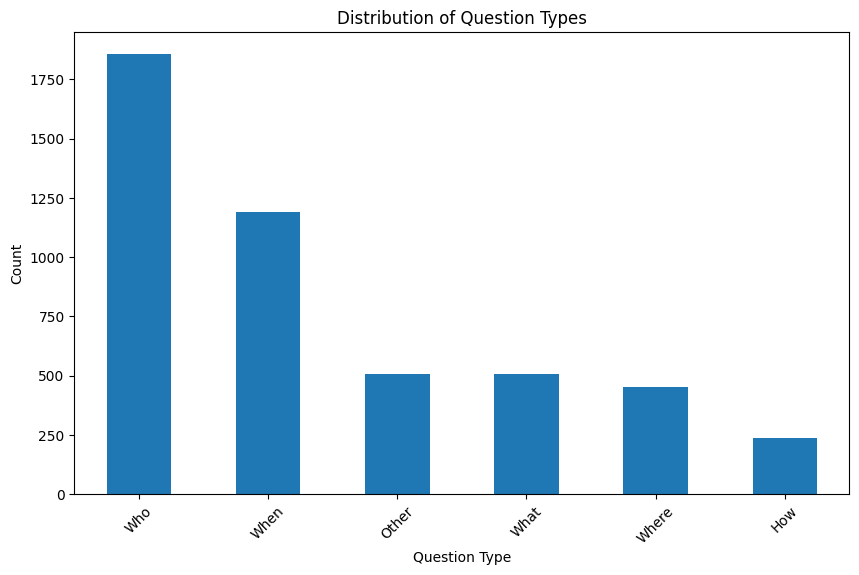

In [20]:
def plot_question_type_distribution(df):
    
    question_type_counts = df['question_type'].value_counts()

    # Plotting the bar graph
    plt.figure(figsize=(10, 6))
    question_type_counts.plot(kind='bar')
    plt.title('Distribution of Question Types')
    plt.xlabel('Question Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    
plot_question_type_distribution(results_df_copy)

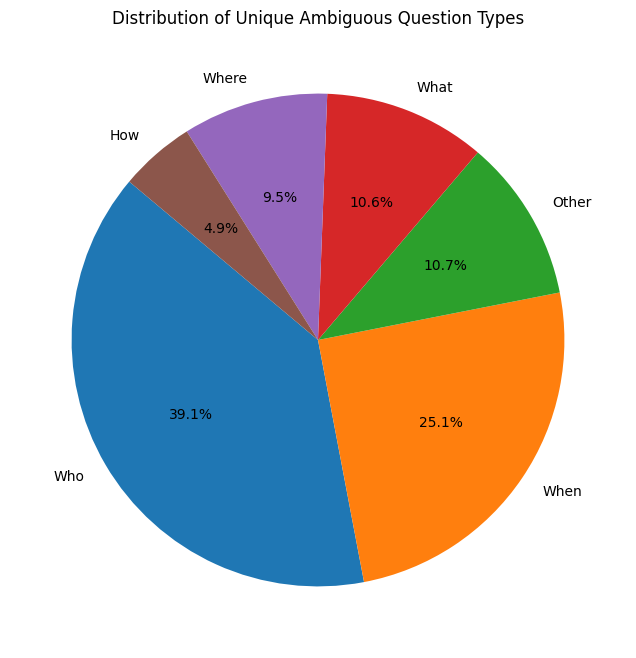

In [21]:
def plot_question_type_pie_chart(df):
    # Check if 'question_type' column exists
    if 'question_type' not in df.columns:
        raise ValueError("DataFrame must contain a column named 'question_type'.")

    # Count the occurrences of each question type
    question_type_counts = df['question_type'].value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(10, 8))
    question_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Unique Ambiguous Question Types')
    plt.ylabel('')  # Hide the y-label
    plt.show()
    
plot_question_type_pie_chart(results_df_copy)

In [22]:
print(len(results_df_copy))

4749


In [23]:
def stratified_split(df, stratify_col, test_size):
    train_df, test_df = train_test_split(df, test_size = test_size, stratify=df[stratify_col])
    return train_df, test_df

train_df, test_df = stratified_split(results_df_copy, 'question_type', 0.34483738)

In [24]:
print(len(train_df))
train_df.head()

3111


,viewed_doc_titles,ambiguous_question,question_type
14446,Voter turnout in the United States presidentia...,What percentage of us population voted in 2016...,What
17470,List of National Basketball Association annual...,Which nba player has scored the most points?,Other
13863,Supreme Governor of the Church of England,Who is the head of the england church?,Who
18175,List of prime ministers of India,Who was the first prime minister of indian?,Who
7817,Columbus (ISS module),When was the european research laboratory (col...,When


In [25]:
results_df.head()

,viewed_doc_titles,ambiguous_question,disambiguated_question,question_type
0,The Simpsons,When did the simpsons first air on television?,When did the Simpsons first air on television ...,When
1,The Simpsons,When did the simpsons first air on television?,When did the Simpsons first air as a half-hour...,When
3,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par...",What
4,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par...",What
5,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par...",What


In [26]:
# join with train_df and results_df
train_df = train_df.merge(results_df, how='left', on=['viewed_doc_titles', 'ambiguous_question', 'question_type'])
print(len(train_df))
train_df.head()

9283


,viewed_doc_titles,ambiguous_question,question_type,disambiguated_question
0,Voter turnout in the United States presidentia...,What percentage of us population voted in 2016...,What,What percentage of us voting age population(VA...
1,Voter turnout in the United States presidentia...,What percentage of us population voted in 2016...,What,What percentage of us population voted for Tru...
2,Voter turnout in the United States presidentia...,What percentage of us population voted in 2016...,What,What percentage of us population voted for Cli...
3,Voter turnout in the United States presidentia...,What percentage of us population voted in 2016...,What,What percentage of us voting eligible populati...
4,List of National Basketball Association annual...,Which nba player has scored the most points?,Other,Which NBA player has scored the most career po...


In [27]:
print(len(test_df))
test_df.head()

1638


,viewed_doc_titles,ambiguous_question,question_type
18681,Constitution of the Republic of Texas,The first article of the texas constitution co...,Other
18430,The Man Who Shot Liberty Valance,Who played the marshal in who shot liberty val...,Who
18412,Mixture,What are the two types of mixtures in science?,What
3254,Drive (golf),Who hit the longest drive in golf history?,Who
11385,The Handmaid's Tale (TV series),When does the next episode of the handmaids ta...,When


In [28]:
test_df = test_df.merge(results_df, how='left', on=['viewed_doc_titles', 'ambiguous_question', 'question_type'])
print(len(test_df))
test_df.head()

4799


,viewed_doc_titles,ambiguous_question,question_type,disambiguated_question
0,Constitution of the Republic of Texas,The first article of the texas constitution co...,Other,The first article of the Constitution of the S...
1,Constitution of the Republic of Texas,The first article of the texas constitution co...,Other,The first article of the Constitution of the R...
2,The Man Who Shot Liberty Valance,Who played the marshal in who shot liberty val...,Who,Who played the marshal in the film who shot li...
3,The Man Who Shot Liberty Valance,Who played the marshal in who shot liberty val...,Who,Who played the marshal in the play who shot li...
4,Mixture,What are the two types of mixtures in science?,What,What is the type of mixtures in science in whi...


In [29]:
# test_df.to_csv('../../data/LARGE/test_final_csv', index=False)
# train_df.to_csv('../../data/LARGE/train_final_csv', index=False)
# ambiguous_dev_LARGE_cleaned_df.to_csv('../../data/LARGE/dev_final_csv', index=False)

# For ChatGPT

In [30]:
test_df.head()

,viewed_doc_titles,ambiguous_question,question_type,disambiguated_question
0,Constitution of the Republic of Texas,The first article of the texas constitution co...,Other,The first article of the Constitution of the S...
1,Constitution of the Republic of Texas,The first article of the texas constitution co...,Other,The first article of the Constitution of the R...
2,The Man Who Shot Liberty Valance,Who played the marshal in who shot liberty val...,Who,Who played the marshal in the film who shot li...
3,The Man Who Shot Liberty Valance,Who played the marshal in who shot liberty val...,Who,Who played the marshal in the play who shot li...
4,Mixture,What are the two types of mixtures in science?,What,What is the type of mixtures in science in whi...


In [31]:
import json
import pandas as pd

def flatten_data_LARGE_new(file_directory):
    with open(file_directory, 'r') as file:
        data = json.load(file)

    flattened_data = []

    # iterate through each entry in the data
    for entry in data:
        question_id = entry['id']
        ambiguous_question = entry['question']

        # Extract snippets and concatenate them with '~~' as delimiter
        # CITATION: These two 'snippets' lines were from help with ChatGPT on how to concatenate '~~' delimiters with each page_content snippet, associated to each disambiguous question.
        snippets = '~~'.join([result['snippet'] for query in entry['used_queries'] for result in query['results']])
        snippets = '~~' + snippets + '~~'
        
        # check the type of annotations and process accordingly
        for annotation in entry['annotations']:
            if annotation['type'] == 'multipleQAs':
                for qa_pair in annotation['qaPairs']:
                    flattened_data.append({
                        'id': question_id,
                        'viewed_doc_titles': entry['viewed_doc_titles'][0],
                        'ambiguous_question': ambiguous_question,
                        'disambiguated_question': qa_pair['question'],
                        'answer': qa_pair['answer'][0],
                        'page_content': snippets
                    })
            elif annotation['type'] == 'singleAnswer':
                flattened_data.append({
                    'id': question_id,
                    'ambiguous_question': ambiguous_question,
                    'disambiguated_question': np.nan,
                    'answer': annotation['answer'][0],
                    'page_content': snippets
                })

    ambiguous_df = pd.DataFrame(flattened_data)
    return ambiguous_df

In [32]:
train_df.drop('question_type', axis=1, inplace=True)
train_df.head()

,viewed_doc_titles,ambiguous_question,disambiguated_question
0,Voter turnout in the United States presidentia...,What percentage of us population voted in 2016...,What percentage of us voting age population(VA...
1,Voter turnout in the United States presidentia...,What percentage of us population voted in 2016...,What percentage of us population voted for Tru...
2,Voter turnout in the United States presidentia...,What percentage of us population voted in 2016...,What percentage of us population voted for Cli...
3,Voter turnout in the United States presidentia...,What percentage of us population voted in 2016...,What percentage of us voting eligible populati...
4,List of National Basketball Association annual...,Which nba player has scored the most points?,Which NBA player has scored the most career po...


In [34]:
file_path = '../../data/LARGE/train.json'
ambiguous_train_LARGE_df = flatten_data_LARGE_new(file_path)
ambiguous_train_LARGE_df.head()

,id,viewed_doc_titles,ambiguous_question,disambiguated_question,answer,page_content
0,-4469503464110108318,The Simpsons,When did the simpsons first air on television?,When did the Simpsons first air on television ...,"April 19, 1987",~~The <b>Simpsons</b> is an American animated ...
1,-4469503464110108318,The Simpsons,When did the simpsons first air on television?,When did the Simpsons first air as a half-hour...,"December 17, 1989",~~The <b>Simpsons</b> is an American animated ...
2,4790842463458965203,NaN,Who played george washington in the john adams...,NaN,David Morse,~~<b>John Adams</b> is a 2008 American <b>tele...
3,-6631915997977101143,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par...",18 years of age,~~The <b>marriage age</b> in <b>the United Sta...
4,-6631915997977101143,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par...",19,~~The <b>marriage age</b> in <b>the United Sta...


In [35]:
ambiguous_train_LARGE_cleaned_df = ambiguous_train_LARGE_df.dropna(subset=['disambiguated_question'])
print(len(ambiguous_train_LARGE_cleaned_df))

14082


In [36]:
ambiguous_train_LARGE_cleaned_df = ambiguous_train_LARGE_cleaned_df.dropna()
num_train_disambiguous = len(ambiguous_train_LARGE_cleaned_df)
ambiguous_train_LARGE_cleaned_df.drop('id', axis=1, inplace=True)
# ambiguous_train_LARGE_cleaned_df.drop('answer', axis=1, inplace=True)
ambiguous_train_LARGE_cleaned_df.head()

,viewed_doc_titles,ambiguous_question,disambiguated_question,answer,page_content
0,The Simpsons,When did the simpsons first air on television?,When did the Simpsons first air on television ...,"April 19, 1987",~~The <b>Simpsons</b> is an American animated ...
1,The Simpsons,When did the simpsons first air on television?,When did the Simpsons first air as a half-hour...,"December 17, 1989",~~The <b>Simpsons</b> is an American animated ...
3,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par...",18 years of age,~~The <b>marriage age</b> in <b>the United Sta...
4,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par...",19,~~The <b>marriage age</b> in <b>the United Sta...
5,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par...",21,~~The <b>marriage age</b> in <b>the United Sta...


In [37]:
test_df = test_df.merge(ambiguous_train_LARGE_cleaned_df, how='left', on=['viewed_doc_titles', 'ambiguous_question', 'disambiguated_question'])

In [38]:
print(len(test_df))
test_df.head()

4801


,viewed_doc_titles,ambiguous_question,question_type,disambiguated_question,answer,page_content
0,Constitution of the Republic of Texas,The first article of the texas constitution co...,Other,The first article of the Constitution of the S...,bill of rights,~~The <b>Constitution</b> of the State of <b>T...
1,Constitution of the Republic of Texas,The first article of the texas constitution co...,Other,The first article of the Constitution of the R...,the three branches of government,~~The <b>Constitution</b> of the State of <b>T...
2,The Man Who Shot Liberty Valance,Who played the marshal in who shot liberty val...,Who,Who played the marshal in the film who shot li...,Andy Devine,~~The Man <b>Who Shot Liberty Valance</b> is a...
3,The Man Who Shot Liberty Valance,Who played the marshal in who shot liberty val...,Who,Who played the marshal in the play who shot li...,Robert G. Slade,~~The Man <b>Who Shot Liberty Valance</b> is a...
4,Mixture,What are the two types of mixtures in science?,What,What is the type of mixtures in science in whi...,homogeneous mixture,"~~In chemistry, a mixture is a material made u..."


In [39]:
test_df.to_csv('../../data/GPT/GPT_test_final_csv', index=False)